# Pandas

На прошлом занятии мы познакомились с библиотекой `numpy`, которая позволяет удобно работать с многомерными однородными (одного типа) массивами. В реальности часто приходиться работать с разнородными (включающими разные типы) данными. Для работы с такими данными используется библиотека `pandas`.

Pandas не входит в [стандартную библиотеку Python](https://docs.python.org/3/library/), поэтому если вы работаете не в Colab ее необходимо будет установить. Информация об установке находится по [ссылке](https://pandas.pydata.org/docs/getting_started/index.html#installation).

Мы же просто импортируем библиотеку. При импорте название `pandas` принято сокращать до `pd`.

In [53]:
import pandas as pd

## CSV и чтение данных из файла

Мы посмотрели, как создать DataFrame или Series вручную. Но чаще всего мы будем работать с уже существующими данными. Чаще всего данные хранят в формате CSV.

CSV (от английского Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления данных в виде таблицы.
Если вы откроете CSV файл в MS блокноте вы увидете что-то вроде:
```
Product A,Product B,Product C,
30,21,9,
35,34,1,
41,11,11
```




Попробуем загрузить реальные данные. Мы будем работать с датасетом [Титаник](https://www.kaggle.com/competitions/titanic/data). Чтобы считать CSV файл используем `pd.read_csv`.

In [54]:
import pandas as pd

In [55]:
#from google.colab import files

# создаем объект этого класса, применяем метод .upload()
# загрузите файл titanic.csv
#uploaded = files.upload()

In [56]:
# Download the data and save it in a variable called data
dataset = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv', index_col='PassengerId')
#dataset = pd.read_csv('/content/titanic.csv', index_col='PassengerId')

Посмотрим на размер датасета:



In [57]:
dataset.shape

(891, 11)

Посмотрим названия колонок и строк:

In [58]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
dataset.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

Датасет состоит из 12 колонок и содержит 891 строку. Посмотрим первые 5 строк.

In [60]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Этот датасет содержит список пассажиров корабля Титаник и информацию о них.
* Survived (0 = No; 1 = Yes) - выжил ли человек.
* SibSp  == Number of Siblings/Spouses Aboard - количество братьев/сестер/супругов на борту Титаника.
* Parch == Number of Parents/Children Aboard - количество родителей/детей на борту.
* Embarked == Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) - порт посадки.

Функция [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) имеет много необязательных параметров.

In [61]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

Например можно указать, какой столбец использовать в качестве индекса с помощью параметра `index_col`

In [62]:
dataset = pd.read_csv(
    'https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv', index_col='PassengerId'
)

dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Описание данных

В `padas` есть встроенная возможность получить информацию о типе данных в таблице, диапазоне значений, статистике и т.д.

In [63]:
dataset = pd.read_csv(
    'https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv', index_col='PassengerId'
)

dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим, что отдает нам `.info()`.

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Мы можем увидеть, что в датасете 891 элемент проиндексированный от 1 до 891. 11 колонок из которых 6 принимают численные значения `int64` и `float64`), 5 принимают текстовые или смешанные значения (`object`). Также мы можем понять, что в наших данных есть пропущенные значения, например для колонки `Cabin` есть только 204 непустых (`non-null`) значения.

`.describe()` - показывает краткую статистическую сводку данных  (по умолчанию числовых).

In [65]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Из этой сводки можно узнать количество заполненных значений `count`, среднее значение `mean`,  стандартное отклонение `std`, минимальное `min` и максимальное `max` значение и значения на [квартилях](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C#%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_%D0%B8_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D0%B8).


Можно посмотреть на сводку по не числовым признакам.

In [66]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Из этой сводки можно узнать количество заполненных значений `count`, количество уникальных значений `unique`, самое часто встречаемое значение `top` и как сколько раз это значение встретилось `freq`.

Или по одному конкретному признаку (`Series`).

In [67]:
dataset['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [68]:
dataset['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Можно получить различные описания отдельных колонок.

In [69]:
dataset['Age'].mean()

np.float64(29.69911764705882)

In [70]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Или посмотреть количество значений для каждого уникального значения.

In [71]:
dataset['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [72]:
dataset['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

При расчете статистики можно группироваться по значениям колонок при помощи `groupby()`.

In [73]:
dataset[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [74]:
dataset[["Sex", "Survived"]].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [75]:
dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Пример с ценами на дома**


In [76]:
import pandas as pd
df = pd.read_csv('C:\скил\DST-156\IDE_NEW\Семинар 4. Группировка/housing.csv')
display(df.head())

# Датасет: https://www.kaggle.com/datasets/camnugent/california-housing-prices

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [77]:
df[['ocean_proximity', 'median_house_value']].groupby(['ocean_proximity']).mean()


,median_house_value
ocean_proximity,
<1H OCEAN,240084.285464
INLAND,124805.392001
ISLAND,380440.000000
NEAR BAY,259212.311790
NEAR OCEAN,249433.977427


<Axes: xlabel='ocean_proximity'>

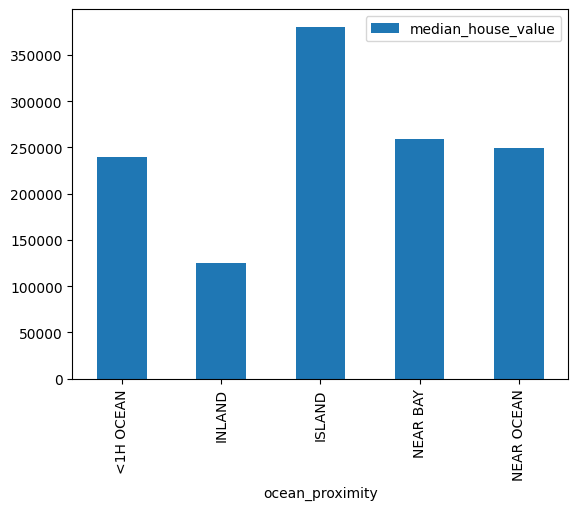

In [78]:
df[['ocean_proximity', 'median_house_value']].groupby(['ocean_proximity']).mean().plot(kind='bar')